In [1]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import PIL
from IPython.display import display, Image


Populating the interactive namespace from numpy and matplotlib


In [2]:
!ls

1080_blur.jpg  720_blur.jpg   blur-effect-fast.c   o.jpg
1080.jpg       720.jpg	      cpd-p1-script.ipynb  processing
4k_blur.jpg    blur	      example.csv	   statistics.py
4k.jpg	       blur-effect.c  notebook		   stb_image


In [12]:
!lscpu

Arquitectura:                        x86_64
modo(s) de operación de las CPUs:    32-bit, 64-bit
Orden de los bytes:                  Little Endian
Address sizes:                       39 bits physical, 48 bits virtual
CPU(s):                              8
Lista de la(s) CPU(s) en línea:      0-7
Hilo(s) de procesamiento por núcleo: 2
Núcleo(s) por «socket»:              4
«Socket(s)»                          1
Modo(s) NUMA:                        1
ID de fabricante:                    GenuineIntel
Familia de CPU:                      6
Modelo:                              60
Nombre del modelo:                   Intel(R) Core(TM) i7-4790K CPU @ 4.00GHz
Revisión:                            3
CPU MHz:                             2300.250
CPU MHz máx.:                        4400,0000
CPU MHz mín.:                        800,0000
BogoMIPS:                            8000.63
Virtualización:                      VT-x
Caché L1d:                           128 KiB
Caché L1i:                   

720
Kernel size:  15
	th:  1
		 0.23199999999999998
	th:  2
		 0.19
	th:  4
		 0.178
	th:  8
		 0.172
Kernel size:  15
	th:  1
		 0.328
	th:  2
		 0.23399999999999999
	th:  4
		 0.202
	th:  8
		 0.188
Kernel size:  15
	th:  1
		 0.4779999999999999
	th:  2
		 0.3
	th:  4
		 0.238
	th:  8
		 0.21600000000000003
Kernel size:  15
	th:  1
		 0.66
	th:  2
		 0.39
	th:  4
		 0.324
	th:  8
		 0.264
Kernel size:  15
	th:  1
		 0.8779999999999999
	th:  2
		 0.514
	th:  4
		 0.346
	th:  8
		 0.322
Kernel size:  15
	th:  1
		 1.148
	th:  2
		 0.648
	th:  4
		 0.426
	th:  8
		 0.382
Kernel size:  15
	th:  1
		 1.4540000000000002
	th:  2
		 0.8059999999999998
	th:  4
		 0.48599999999999993
	th:  8
		 0.48200000000000004


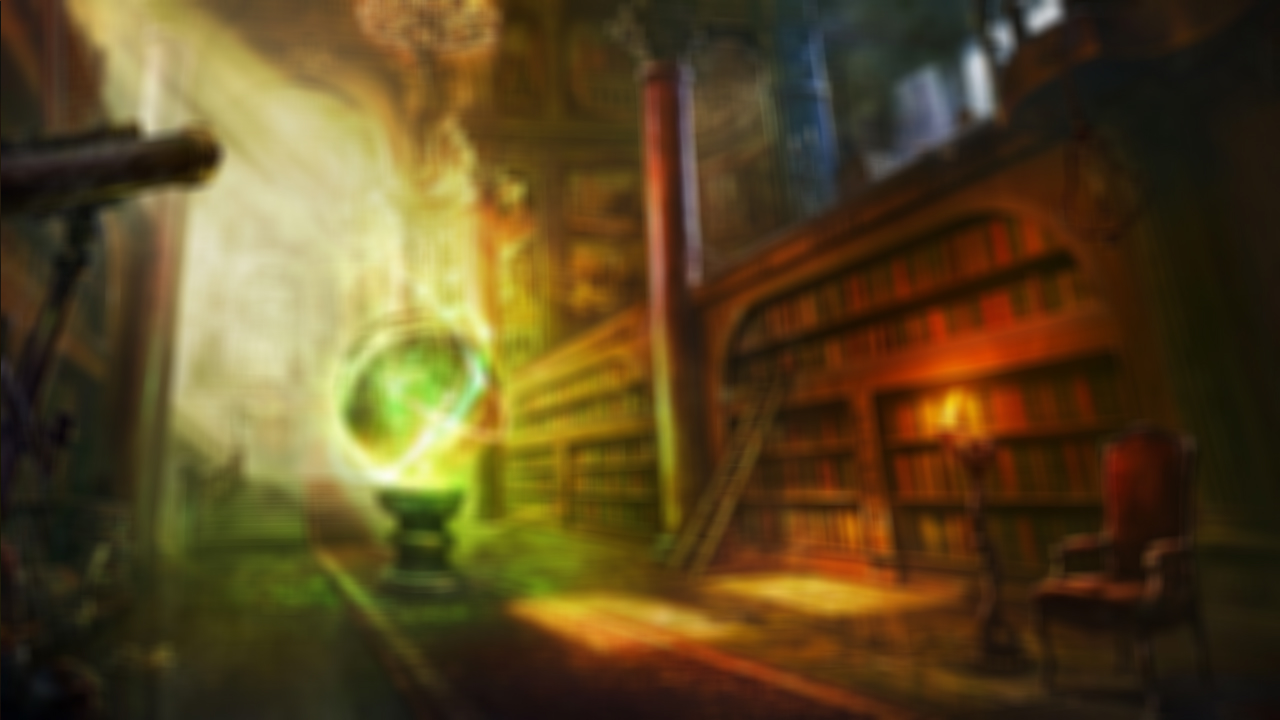

In [19]:
!gcc blur-effect.c -o blur -lm -pthread



image_names = ['720']
images = []
data = []
iterations = 5



for image in image_names:
    print(image)
    times = []
    for kernel in range(7):
        t_threads = []
        for threads in range(4):
            t = 0
            for _ in range(iterations):
                t_out = !/usr/bin/time -f "%e" ./blur {image}.jpg {image}_blur.jpg {3 + 2*kernel} {2**threads}
                t += float(t_out[0])             
            t_threads.append(t/iterations)
        times.append(t_threads)
    data.append(times)
    images.append(Image((image + '_blur.jpg'), width = 500))

    
for times in data:
    for i in range(7):
        print("Kernel size: ", (3 + 2*i))
        for j in range(4):
            print("\tth: ", 2**j)
            print("\t\t", times[i][j])
            
            
display(*images)

,K=3,K=5,k=7,K=9,K=11,k=13,K=15
th=1,0.4,0.6,0.3,0.7,0.6,0.6,0.7
th=2,0.3,0.4,0.6,0.4,0.3,0.7,0.5
th=4,0.6,0.6,0.7,0.2,0.4,0.2,0.6
th=8,0.6,0.5,0.7,0.5,0.5,0.3,0.5
th=16,0.6,0.6,0.5,0.7,0.7,0.7,0.3


,K=3,K=5,k=7,K=9,K=11,k=13,K=15
th=1,1.0,1.0,1.0,1.0,1.0,1.0,1.0
th=2,1.3,1.5,0.5,1.7,2.0,0.9,1.4
th=4,0.7,1.0,0.4,3.5,1.5,3.0,1.2
th=8,0.7,1.2,0.4,1.4,1.2,2.0,1.4
th=16,0.7,1.0,0.6,1.0,0.9,0.9,2.3


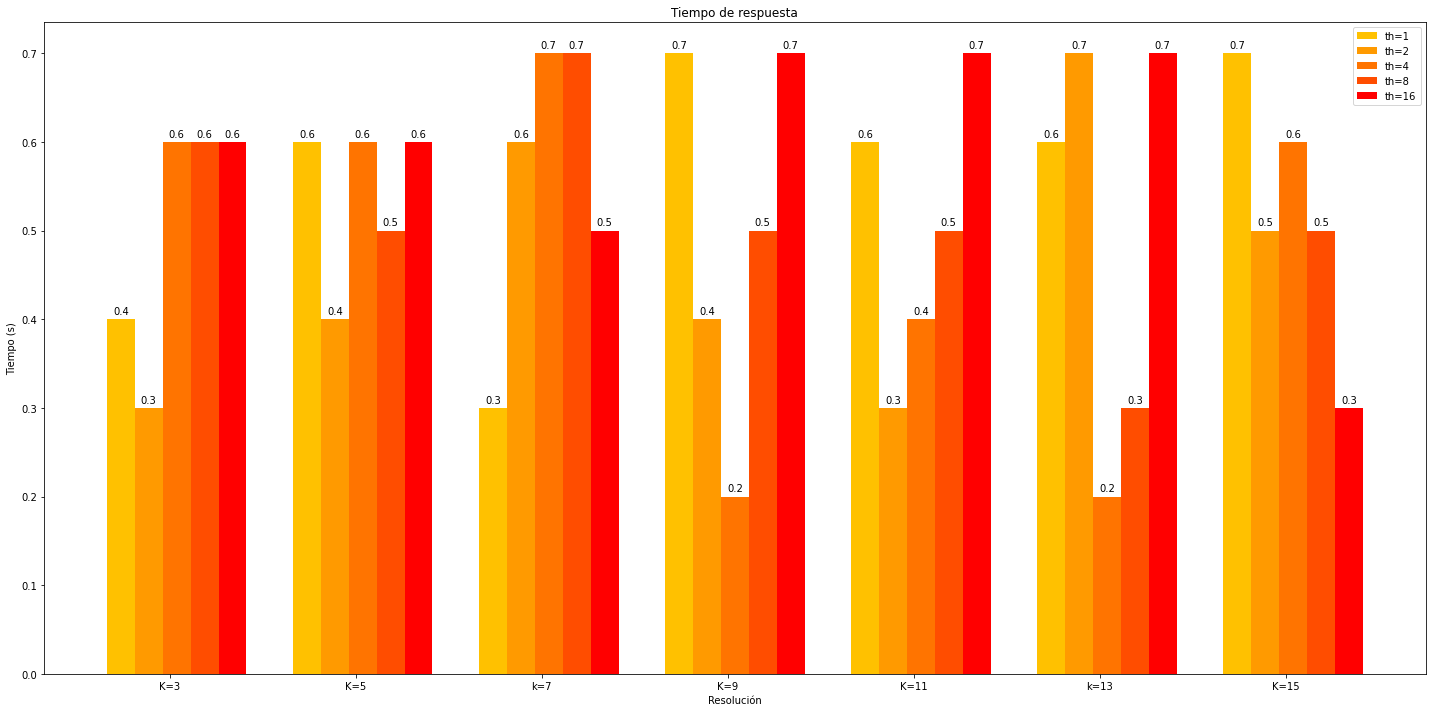

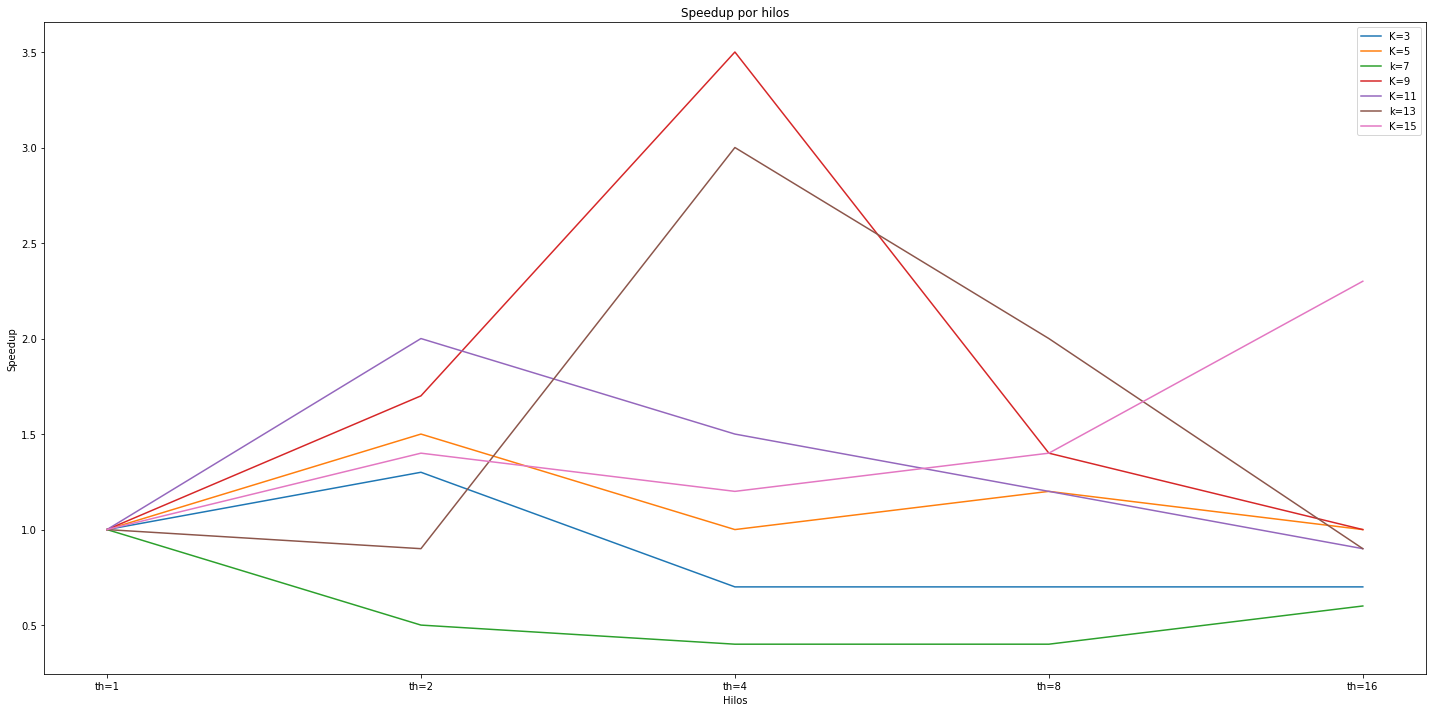

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML, display_html, display
import matplotlib
# 1 import sys

# config matplotlib
matplotlib.rcParams['figure.figsize'] = [20, 10] # for square canvas
matplotlib.rcParams['figure.subplot.left'] = 0
matplotlib.rcParams['figure.subplot.bottom'] = 0
matplotlib.rcParams['figure.subplot.right'] = 1
matplotlib.rcParams['figure.subplot.top'] = 1

# 2 arg = str(sys.argv)
def auto_label(rects, ax):
    # """Attach a text label above each bar in *rects*, displaying its height."""
    # https://matplotlib.org/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


#
# sec, 2, 4, 8, 16
# =======================================================================
#                               DATA
# ========================================================================
"""
df_example = pd.DataFrame(np.random.rand(7 * 5, 10))
df_example.to_csv("example.csv")"""

size_group = 7
num_of_group = 5
decimals = 1
# 3 cereal_df = pd.read_csv("arg[1]")
cereal_df = pd.read_csv("example.csv")
num = cereal_df.to_numpy()
median = []
deviation = []
kernelLabel = ["K=3", "K=5", "k=7", "K=9", "K=11", "k=13", "K=15"]
threadsLabel = ["th=1", "th=2", "th=4", "th=8", "th=16"]
# obtain media
for val in num:
    median.append(np.median(val))
    deviation.append((np.std(val)))

data = []
speedup = []
# tabular
for i in range(num_of_group):
    data.append(np.around(median[i * size_group:(i * size_group) + size_group], decimals=decimals))
    speedup.append((np.around(np.divide(data[0], data[i]), decimals=decimals)))
data = np.array(data)
speedup = np.array(speedup)
df1 = pd.DataFrame(data, index=threadsLabel,
                   columns=kernelLabel)
df2 = pd.DataFrame(speedup, index=threadsLabel,
                   columns=kernelLabel)
# =======================================================================
#                            Graphs
# =======================================================================


x = np.arange(len(kernelLabel))
x1 = np.arange(len(threadsLabel))
width = 0.15

fig1, ax1 = plt.subplots()
fig3, ax2 = plt.subplots()

# Graphs labels
ax1.set_ylabel("Tiempo (s)")
ax1.set_xlabel("Resolución")
ax1.set_title("Tiempo de respuesta")
ax1.set_xticks(x)
ax1.set_xticklabels(kernelLabel)

ax2.set_ylabel("Speedup")
ax2.set_xlabel("Hilos")
ax2.set_title("Speedup por hilos")
ax2.set_xticks(x1)
ax2.set_xticklabels(threadsLabel)

rects = []
line = []

colors = ['#ffc100','#ff9a00','#ff7400','#ff4d00','#ff0000']
# bars
for i in range(num_of_group):
    r = ax1.bar(x + ((i - (size_group / 4)) * width), data[i], width, label=threadsLabel[i], color = colors[i])
    auto_label(r, ax1)
# lines
for i in range(size_group):
    ax2.plot(speedup[:, i], label=kernelLabel[i])

ax1.legend()
ax2.legend()
fig1.tight_layout()
fig3.tight_layout()

display(HTML('<h2>Tiempo de respuesta</h2>'))
display_html(df1)
display(HTML('<h2>Speedup</h2>'))
display_html(df2)
plt.show()
